In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import string
import nltk
nltk.download('stopwords')
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from tqdm import tqdm
warnings.filterwarnings('ignore')
!pip install gradio
import gradio as gr

C:\Users\20155\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\20155\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df=pd.read_json('labeled_validation_dataset.jsonl',lines=True)

In [5]:
df

,example_id,paragraph,summary
0,0,وتحت عنوان من الكارثة إلى التحدى يبدأ الكاتب ع...,يبدأ الكاتب عرض الكتاب الرابع تحت عنوان من الك...
1,1,ولم يعترف دبلوماسيو هاتين الدولتين بالعريضة ال...,دبلوماسيو الدولتين لم يعترفوا بالعريضة التي قا...
2,2,قامت ولاية حلب بعد اعلان الجنرال الفرنسي هنري ...,أعلن غورو الانتداب الفرنسي على سوريا لكي يعاقب...
3,3,دولة مصر العربيه هي ليست اي دوله وليست اي شعب ...,مصر هي أم البلاد، وقائدة العرب؛ فهي أرض بلاد ا...
4,4,السوريون يصرون على استقلال بلادهم : و مثلما رف...,الشعب السوري يصر على استقلال بلدهم من السيطرة ...
...,...,...,...
149,149,حزب الوفد سيحتفل بمئوية ثورة 1919 يوم 9 مارس ا...,احتفال مئوية ثورة 1919 كان من منطلق وطني ليس ح...
150,150,حيث أعلن مجلس قيادة الثورة في 18 يونيه 1953 قي...,مجلس قيادة الثورة أعلن عن قيام الجمهورية المصر...
151,151,وبرغم أن عبد الرحمن فهمي كان يضم في ذلك الجهاز...,ضم عبد الرحمن فهمي في الجهاز السري عدد كبير من...
152,152,ولم تقتصر مقومات بورسعيد كمدينة عالمية منذ نشأ...,امتدت بورسعيد لكي تشمل الطابع الثقافي للمدينة،...


In [6]:
df.drop('example_id',inplace=True,axis=1)

In [7]:
df.head()

,paragraph,summary
0,وتحت عنوان من الكارثة إلى التحدى يبدأ الكاتب ع...,يبدأ الكاتب عرض الكتاب الرابع تحت عنوان من الك...
1,ولم يعترف دبلوماسيو هاتين الدولتين بالعريضة ال...,دبلوماسيو الدولتين لم يعترفوا بالعريضة التي قا...
2,قامت ولاية حلب بعد اعلان الجنرال الفرنسي هنري ...,أعلن غورو الانتداب الفرنسي على سوريا لكي يعاقب...
3,دولة مصر العربيه هي ليست اي دوله وليست اي شعب ...,مصر هي أم البلاد، وقائدة العرب؛ فهي أرض بلاد ا...
4,السوريون يصرون على استقلال بلادهم : و مثلما رف...,الشعب السوري يصر على استقلال بلدهم من السيطرة ...


In [12]:
arabic = '۰١٢٣٤٥٦٧٨٩'
english = '0123456789'
translation_table = str.maketrans( arabic,english)

In [9]:
import re
import regex

In [15]:
def cleaner(text):
    s=[]
    for sen in tqdm(text):
        #convert arabic numbers to en numbers
        sen=sen.translate(translation_table)
        #keep only arabic text
        sen = regex.sub(r"[^\p{Script=Arabic}\s.,]", "", sen)
        #remove "ـ"
        sen = sen.replace("ـ", "")
        #remove '.' from text
        sen = sen.replace(".", "")
        #remove dublicated spaces
        sen = re.sub(r"\s+", " ", sen)
        s.append(sen)
    return s

In [16]:
df['summary']=cleaner(df['summary'])

100%|██████████████████████████████████████████████████████████████████████████████| 154/154 [00:00<00:00, 9632.88it/s]


In [19]:
df['paragraph']=cleaner(df['paragraph'])

100%|██████████████████████████████████████████████████████████████████████████████| 154/154 [00:00<00:00, 3019.74it/s]


In [16]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(df,test_size=0.1,random_state=4,shuffle=True)

In [17]:
train.to_csv('train.csv')
val.to_csv('val.csv')

In [18]:
!git clone https://github.com/huggingface/transformers
%cd transformers
!pip install .

Cloning into 'transformers'...
remote: Enumerating objects: 148660, done.
remote: Counting objects: 100% (621/621), done.
remote: Compressing objects: 100% (275/275), done.
remote: Total 148660 (delta 362), reused 470 (delta 285), pack-reused 148039
Receiving objects: 100% (148660/148660), 152.42 MiB | 22.18 MiB/s, done.
Resolving deltas: 100% (110332/110332), done.
/kaggle/working/transformers
Processing /kaggle/working/transformers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.31.0.dev0-py3-none-any.whl size=7283429 sha256=84adb2a307f2a1f707d33bdf09e878d2f1fe5a0ae212574674b52c8a8b99435f
  Stored in directory: /tmp/pip-ephem-wheel-cache-9zzig_n1/wheels/7e/b2/24/0b3be37b3b423a6f2fd25fd6368a1f4b0888942789c7e68bc6
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.30.1
    Unins

In [19]:
pip install -r /kaggle/working/transformers/examples/pytorch/summarization/requirements.txt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 40.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 73.6 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 9.4 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24954 sha256=8136ca69de634e96baaee1e427b544edc172607e5d2f0e49a8c8a9344801dfb8
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score
Note: you 

In [2]:
! pip install -U git+https://github.com/huggingface/transformers.git
! pip install -U git+https://github.com/huggingface/accelerate.git

  Cloning https://github.com/huggingface/transformers.git to c:\users\20155\appdata\local\temp\pip-req-build-omhgyzwq
  Resolved https://github.com/huggingface/transformers.git to commit fded6f41861561a1e3311850e5d11c4bbf8a0fb3
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached tokenizers-0.13.3-cp39-cp39-win_amd64.whl (3.5 MB)
  Created wheel for transformers: filename=transformers-4.31.0.dev0-py3-none-any.whl size=7283496 sha256=32a10f4a904f4653c8de3b4a276c98eb7628b66c40b2b7ad635fe9d1bf5d1338
  Stored in directory: C:\Users\20155\AppData\Local\Temp\pip-ephem-wheel-cache-s2ywvsae\wheels\f7\92\8c\752ff3bfcd3439805d8bbf641614da38ef3226e127ebea86ee
Successfully built transformers
  Attempting uninstall: tokenizers
  

  Running command git clone -q https://github.com/huggingface/transformers.git 'C:\Users\20155\AppData\Local\Temp\pip-req-build-omhgyzwq'
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
simplet5 0.1.4 requires transformers==4.16.2, but you have transformers 4.31.0.dev0 which is incompatible.


  Cloning https://github.com/huggingface/accelerate.git to c:\users\20155\appdata\local\temp\pip-req-build-1ow_t4we
  Resolved https://github.com/huggingface/accelerate.git to commit e0f5e030098aada5e112708eee3537475dea3a83
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for accelerate: filename=accelerate-0.21.0.dev0-py3-none-any.whl size=243452 sha256=f368f321a1f58b1a236fd1ca2c106cb971e79c69e8daf5032ad3c6430176f524
  Stored in directory: C:\Users\20155\AppData\Local\Temp\pip-ephem-wheel-cache-g356wuuq\wheels\60\53\1d\f8f7d9ed24f2b70cf9b37ecd31318a274049263effcc4b5bf3
Successfully built accelerate


  Running command git clone -q https://github.com/huggingface/accelerate.git 'C:\Users\20155\AppData\Local\Temp\pip-req-build-1ow_t4we'


In [21]:
!mkdir tst-summarization

In [24]:
!python /kaggle/working/transformers/examples/pytorch/summarization/run_summarization.py \
    --model_name_or_path 'facebook/mbart-large-50' \
    --do_train \
    --do_eval \
    --save_strategy "no" \
    --load_best_model_at_end True \
    --train_file 'train.csv' \
    --validation_file 'val.csv' \
    --output_dir 'tst-summarization' \
    --overwrite_output_dir \
    --text_column 'paragraph' \
    --summary_column 'summary' \
    --num_train_epochs 22 \
    --lang 'arabic' \
    --per_device_train_batch_size=1 \
    --per_device_eval_batch_size=4

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [25]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
# specify the path to the saved model files
model_path = "tst-summarization"

In [26]:
#load the tokenizer from saved model 
tokenizer = AutoTokenizer.from_pretrained(model_path)
#load the saved model
model = AutoModelForSeq2SeqLM.from_pretrained(model_path)

In [20]:
#load validation data
df2 = pd.read_json("preprocessed validation_data.jsonl",lines=True)

In [21]:
#preprosess the data
df2['paragraph']=cleaner(df2['paragraph'])

100%|██████████████████████████████████████████████████████████████████████████████| 272/272 [00:00<00:00, 4946.05it/s]


In [11]:
df2.head()

,example_id,summary
0,0,يبدأ الكاتب عرض الكتاب الرابع تحت عنوان من الك...
1,1,ولم يعترف دبلوماسيو الدولتين بالعريضة التي قام...
2,2,أعلن غورو الانتداب الفرنسي على سوريا لكي يعاقب...
3,3,مصر هي أم البلاد وقائدة العرب فهي أرض بلاد الن...
4,4,السوريون يصرون على استقلال بلدهم من السيطرة ال...


In [23]:
#generate summary
def generate_column_summary(text):
    a=[]
    for sen in tqdm(text):
        #to make the min summary len >= 0.3 of the original text
        x= int(0.08*len(sen))
        #to make the max summary len <= 0.4 of the original text
        y= int(0.4*len(sen))
        input_ids = tokenizer.encode(sen, truncation=True, max_length=512, return_tensors="pt")
        generated_ids = model.generate(input_ids,min_length=x, max_length=y)
        generated_title = tokenizer.decode(generated_ids[0], skip_special_tokens=True)
        a.append(generated_title)
    return a

In [ ]:
a= generate_column_summary(df2['paragraph'])

In [64]:
df2['summary'][3]

'وبعد أن ألقينا الضوء على أهم فتوحات بلاد شمال إفريقيا تعال معا نتناول فتح سبيطلة بوصفها نموذجا لفتوحات هذه البلاد بشيء من التفصيل فتح سبيطلة ه م كتب عبد الله بن سعد بن أبي السرح إلى الخليفة الراشد عثمان بن عفان أنه يستأذنه في فتح سبيطلة فأجابهم للفتح وواصل عبد الله بن سعد السير حتى وصل جيشه إلى مدينة سبيطلة بأمان ثم التقى بجيش جريجوريوس جرجير والي إفريقية البيزنطي وعرض عليه إما الدخول في الإسلام أو دفع الجزية فنشبت المعركة بينهما وفتحت سبيطلة وانتصر المسلمون'

In [68]:
len(a[4])

181

In [69]:
print(len(df2['paragraph'][4])*0.4)

194.4


In [70]:
#save generated summary into data frame
df2['summary']=a

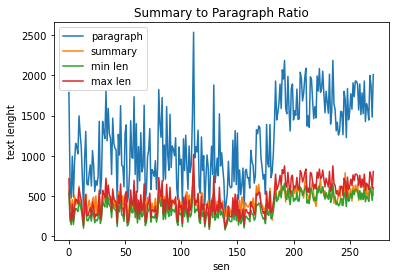

In [43]:
plt.plot(df2['paragraph'].str.len(), label='paragraph')
plt.plot(df2['summary'].str.len(), label='summary')
plt.plot(df2['paragraph'].str.len()*0.3, label='min len')
plt.plot(df2['paragraph'].str.len()*0.4, label='max len')
plt.title('Summary to Paragraph Ratio')
plt.ylabel('text lenght')
plt.xlabel('sen')
plt.legend()
plt.show()

In [ ]:
df2.drop('paragraph',inplace=True,axis=1)

In [71]:
#convert data frame to .jsonl file
df2.to_json("predictions.jsonl", lines=True, orient='records', force_ascii=False)

In [52]:
def sen_cleaner(sen):
    #convert arabic numbers to en numbers
    sen=sen.translate(translation_table)
    #keep only arabic text
    sen = regex.sub(r"[^\p{Script=Arabic}\s.,]", "", sen)
    #remove "ـ"
    sen = sen.replace("ـ", "")
    #remove '.' from text
    sen = sen.replace(".", "")
    #remove dublicated spaces
    sen = re.sub(r"\s+", " ", sen)
    return sen

In [53]:
def generate_text_summary(sen):
    text=sen
    sen=sen_cleaner(text)
    #to make the min summary len >= 0.3 of the original text
    x= int(0.08*len(sen))
    #to make the min summary len <= 0.4 of the original text
    y= int(0.4*len(sen))
    input_ids = tokenizer.encode(sen, truncation=True, max_length=512, return_tensors="pt")
    generated_ids = model.generate(input_ids,min_length=x, max_length=y)
    generated_title = tokenizer.decode(generated_ids[0], skip_special_tokens=True)
    return generated_title

In [33]:
generate_text_summary(df['paragraph'][0])

'يبدأ الكاتب عرض الكتاب الرابع تحت عنوان من الكارثة إلى التحدى حيث يوضح كيف كانت إسرائيل فرحة بنصرها عام وكيف بدأت حرب الاستنزاف ثم يتكلم عن وفاة عبدالناصر وتولى أنور السادات حكم مصر ويعرض الكاتب للخطط والاستعدادات المصرية ثم الاستعدادات الإسرائيلية ثم يبدأ بعرض وقائع الحرب ويتوقف الكاتب عند يوم أكتوبر ويقول إن هذا اليوم كان أسوأ هزيمة فى تاريخ الجيش الإسرائيلى ثم ينتقل بنا إلى الجبهة السورية ثم يعود ثانية إلى يوميات الحرب من أكتوبر إلى و أكتوبر والعمليات النهائية فى سوريا إلى أكتوبر ثم يعرض الكاتب المعركة الخاصة بالاستيلاء على مدينة السويس من أكتوبر إلى أكتوبر ثم تطورات هذه المعركة'

In [54]:
gr.Interface(fn=generate_text_summary, inputs=["text"], outputs= "text").launch()

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
